In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
dftrain = pd.read_csv('train.csv')

In [101]:
dftest  = pd.read_csv('test.csv')

In [102]:
print(dftrain.shape)
print(dftest.shape)

(8523, 12)
(5681, 11)


In [103]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [105]:
# For preprocessing of data, concatenation of both train and test files
# must be done.
# For Concatenation the number of columns or variables must be same.
# For purpose of concatenation, temporarily add dependent variable to
# test data and fill column with word 'test'

In [106]:
dftrain['Item_Outlet_Sales']='test'

In [107]:
# Concatenation of both dataframe for preprocessing
combinedf = pd.concat([dftrain,dftest],axis=0)

# axis = 0 is Row wise Concatenationo
# axis = 1 is Column wise Concatenation

In [108]:
combinedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [109]:
numcols = combinedf.select_dtypes(include=np.number)
objcols = combinedf.select_dtypes(include=['object'])

In [110]:
print(numcols.shape)
print(objcols.shape)

(14204, 4)
(14204, 8)


In [111]:
numcols.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [112]:
# impute Item_Weight

numcols.Item_Weight = numcols.Item_Weight.fillna(numcols.Item_Weight.mean())

In [113]:
# impute Outlet_Size

objcols.Outlet_Size.value_counts(dropna=False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [114]:
# impute with word "Missing"

objcols.Outlet_Size = objcols.Outlet_Size.fillna("Missing")

In [115]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [116]:
objcols.Outlet_Size.value_counts()

Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [117]:
objcols.Item_Identifier.head(10)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
5    FDP36
6    FDO10
7    FDP10
8    FDH17
9    FDU28
Name: Item_Identifier, dtype: object

In [118]:
# Create a new variable called item_Code based on Item_Identifier
objcols['Item_Code'] = objcols.Item_Identifier.str[0:2]

In [119]:
objcols.Item_Code.value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [120]:
objcols.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [121]:
objcols.Item_Fat_Content = objcols.Item_Fat_Content.replace(['LF','low fat'],'Low Fat')

In [122]:
objcols.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    4824
reg         195
Name: Item_Fat_Content, dtype: int64

In [123]:
objcols.Item_Fat_Content = objcols.Item_Fat_Content.replace('reg','Regular')

In [124]:
objcols.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [125]:
for col in objcols.columns:
    freq = objcols[col].value_counts(dropna=False)
    print(freq.head())

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
Name: Item_Identifier, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
Name: Outlet_Identifier, dtype: int64
Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64
test    8523
NaN     5681
Name: Item_Outlet_Sales, dtype: int64
FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64


In [126]:
# Create a new variable "Outlet_Age" as of 2022 using OutletEstablishment Year

numcols['Outlet_Age'] = 2022-numcols.Outlet_Establishment_Year

In [127]:
numcols.Outlet_Age.describe()

count    14204.000000
mean        24.169319
std          8.371664
min         13.000000
25%         18.000000
50%         23.000000
75%         35.000000
max         37.000000
Name: Outlet_Age, dtype: float64

In [128]:
# Data Transformation - Numeric Variables - Independent Variables
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [129]:
numcols_df = numcols.drop('Outlet_Establishment_Year', axis = 1)

In [130]:
# Standardization

stdscaler = StandardScaler()

In [131]:
numcols_df_scaled = stdscaler.fit_transform(numcols_df)

In [132]:
numcols_df_scaled

array([[-0.82493872, -0.96985228,  1.75251118, -0.13968068],
       [-1.62322365, -0.90706338, -1.4936965 , -1.3342284 ],
       [ 1.11172885, -0.95600038,  0.00987397, -0.13968068],
       ...,
       [-0.65961344,  0.14722609, -0.35855788, -0.49804499],
       [ 0.59213511, -1.28171205,  1.18574722, -1.09531886],
       [-0.77770293,  0.7533967 , -0.98589388, -0.49804499]])

In [133]:
numcols_df_scaled = pd.DataFrame(numcols_df_scaled, columns = numcols_df.columns)

In [134]:
numcols_df_scaled.head()# Standard Scaler scales into both negative
# and positive values. Some obs will be above and some below mean
# (x-mean)/stddeviation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.824939,-0.969852,1.752511,-0.139681
1,-1.623224,-0.907063,-1.493696,-1.334228
2,1.111729,-0.956000,0.009874,-0.139681
3,1.513233,-1.281712,0.661838,-0.020226
4,-0.912325,-1.281712,-1.403623,1.293777


In [135]:
# Normalization or Min Max Scaler - (X-Xmin)/(Xmax-Xmin)
minmax = MinMaxScaler()

In [136]:
numcols_df_minmax = minmax.fit_transform(numcols_df)

In [137]:
numcols_df_minmax = pd.DataFrame(numcols_df_minmax, columns = numcols_df.columns)

In [138]:
numcols_df_minmax.head() # No Negative Values and range is only 0 to 1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,0.282525,0.048866,0.927507,0.416667
1,0.081274,0.058705,0.072068,0.000000
2,0.770765,0.051037,0.468288,0.416667
3,0.871986,0.000000,0.640093,0.458333
4,0.260494,0.000000,0.095805,0.916667


In [139]:
# Robust Scaler uses Quartiles used in case of outliers
robust = RobustScaler()

In [140]:
numcols_df_robust = robust.fit_transform(numcols_df)

In [141]:
numcols_df_robust = pd.DataFrame(numcols_df_robust, columns = numcols_df.columns)

In [142]:
numcols_df_robust.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.521322,-0.566751,1.171145,0.000000
1,-1.025799,-0.518530,-1.023237,-0.588235
2,0.702559,-0.556113,-0.006849,0.000000
3,0.956290,-0.806258,0.433868,0.058824
4,-0.576545,-0.806258,-0.962349,0.705882


<Axes: >

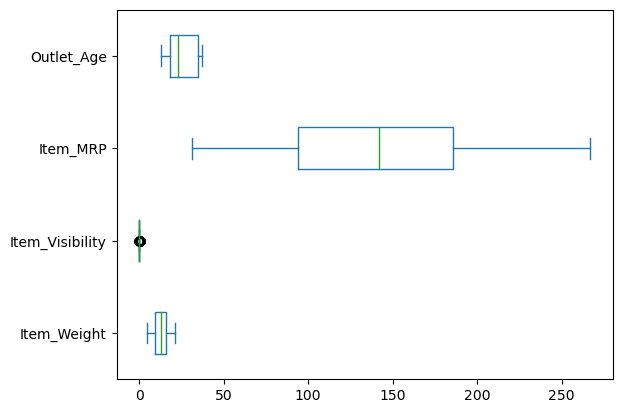

In [143]:
numcols_df.plot(kind = 'box', vert=False)

<Axes: >

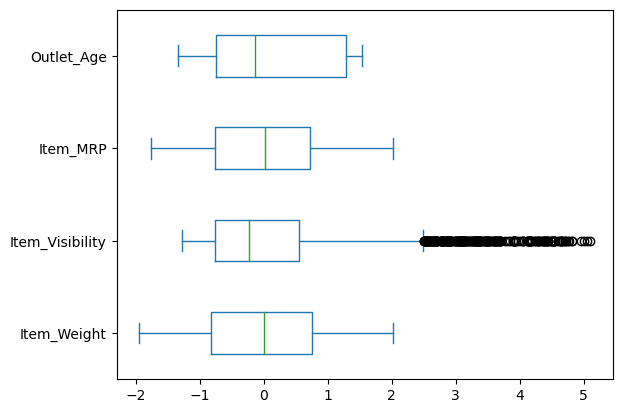

In [144]:
numcols_df_scaled.plot(kind = 'box', vert=False)

<Axes: >

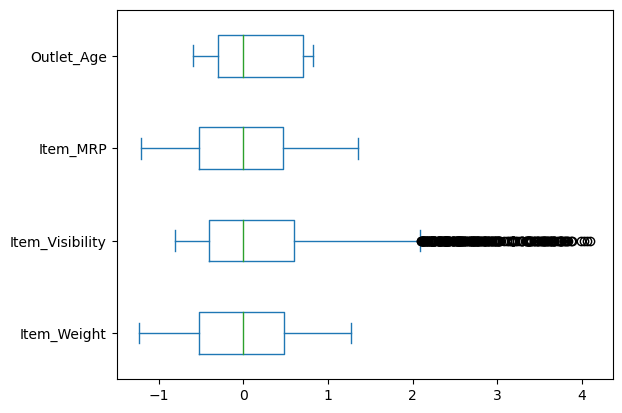

In [145]:
numcols_df_robust.plot(kind = 'box', vert=False)

<Axes: >

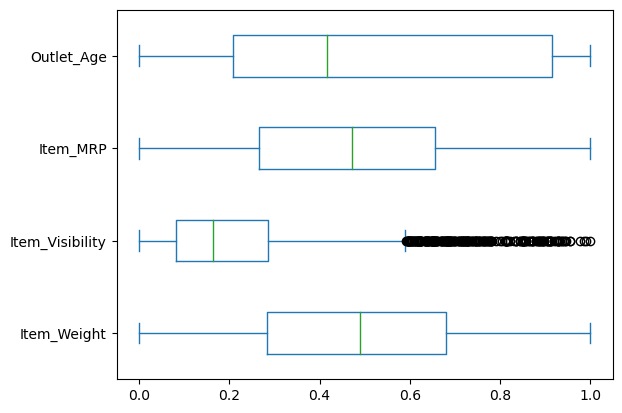

In [146]:
numcols_df_minmax.plot(kind = 'box', vert = False)

In [147]:
# Dummy Variable Enconding - Encoding Object or String Data
numcols_df['Item_Outlet_Sales'] = objcols.Item_Outlet_Sales

In [148]:
# Moving dependent Variable Item_Outlet_Sales from object to numeric
objcols = objcols.drop('Item_Outlet_Sales',axis=1)

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le = LabelEncoder()

In [151]:
objcols_encode = objcols.apply(le.fit_transform)

In [152]:
objcols_encode.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,156,0,4,9,1,0,1,1
1,8,1,14,3,1,2,2,0
2,662,0,10,9,1,0,1,1
3,1121,1,6,0,2,2,0,1
4,1297,0,9,1,0,2,1,2


In [153]:
objcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'],
      dtype='object')

In [154]:
objcols_dummy = pd.get_dummies(objcols, columns=['Item_Fat_Content', 
                                              'Item_Type', 
                                              'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'])

In [155]:
print(objcols.shape)
print(objcols_encode.shape)
print(objcols_dummy.shape)

(14204, 8)
(14204, 8)
(14204, 43)


In [156]:
numcols_df_scaled = numcols_df_scaled.reset_index()

In [157]:
objcols_dummy = objcols_dummy.reset_index()

In [158]:
bigmart_df = pd.concat([numcols_df_scaled, objcols_dummy], axis=1)

In [159]:
numcols_df = numcols_df.reset_index()

In [160]:
bigmart_df['Item_Outlet_Sales'] = numcols_df.Item_Outlet_Sales

In [161]:
# Split data back to tarin and test

bigmarttrain_df = bigmart_df[bigmart_df.Item_Outlet_Sales!='test']
bigmarttest_df  = bigmart_df[bigmart_df.Item_Outlet_Sales=='test']

In [162]:
bigmarttest_df = bigmarttest_df.drop('Item_Outlet_Sales', axis=1)

In [163]:
bigmarttrain_df = bigmarttrain_df.drop('index',axis=1)

In [164]:
bigmarttest_df = bigmarttest_df.drop('index', axis = 1)

In [165]:
# Split Data in to dependent variable(y) & Independent Variable ( X's )
y = bigmarttrain_df.Item_Outlet_Sales
X = bigmarttrain_df.drop(['Item_Identifier','Item_Outlet_Sales'], axis = 1)

In [166]:
bigmarttest_df = bigmarttest_df.drop('Item_Identifier', axis = 1)

In [167]:
print(X.shape)
print(bigmarttest_df.shape)

(5681, 46)
(8523, 46)


In [168]:
#plt.figure(figsize=(10,5))
# fig,ax=plt.subplots(3,1)
#sns.kdeplot(y,ax=ax[0])
#sns.histplot(y,ax=ax[1])
#sns.boxplot(y,ax=ax[2],orient='h')
#plt.show()

In [169]:
y=y.astype(float)

<Axes: >

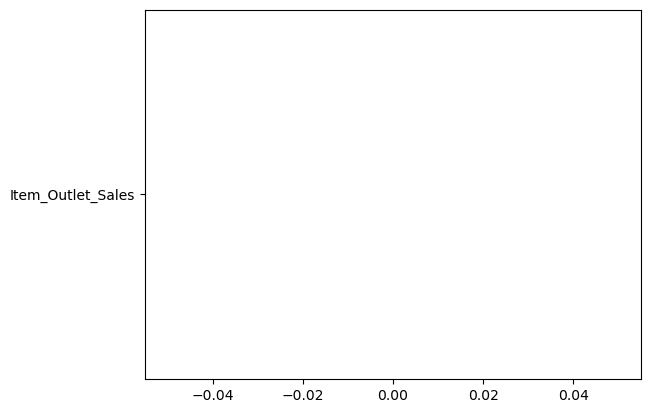

In [170]:
np.log1p(y).plot(kind='box',vert=False)

In [171]:
# For EDA & hypothesis Testing

trainbigmart = pd.concat([numcols, objcols], axis=1)

In [172]:
trainbigmart['Item_Outlet_Sales'] = bigmarttrain_df.Item_Outlet_Sales

In [173]:
trainbigmart = trainbigmart[trainbigmart.Item_Outlet_Sales!='test']

In [174]:
# EDA using trainbigmart
# Hypothesis test

<Axes: ylabel='Item_Fat_Content'>

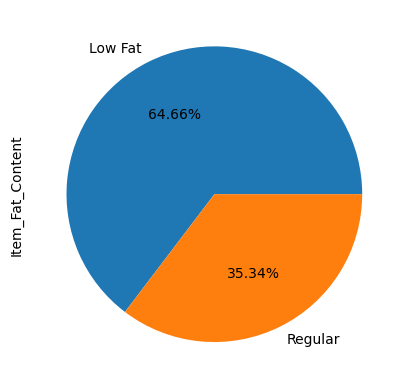

In [175]:
# 1) Pie diagram of Item Fat Content

trainbigmart.Item_Fat_Content.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='Outlet_Size'>

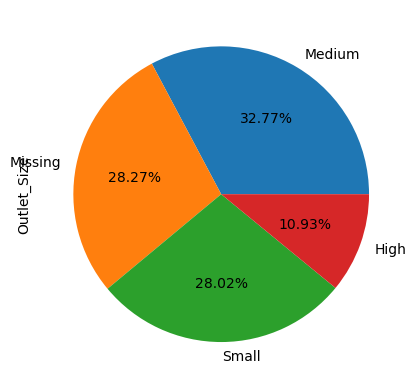

In [176]:
# 2 ) Pie Diagram of Outlet Size

trainbigmart.Outlet_Size.value_counts().plot(kind='pie',autopct='%.2f%%')

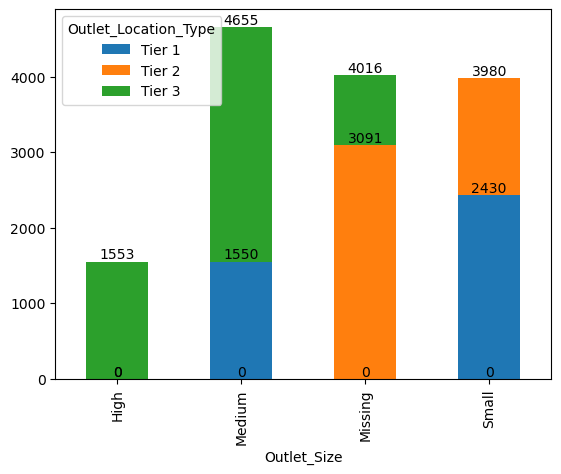

In [177]:
# 3) Cross Tabulation Outlet Size and Outlet Location & Stacked barplot
ax = pd.crosstab(trainbigmart.Outlet_Size,trainbigmart.Outlet_Location_Type).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

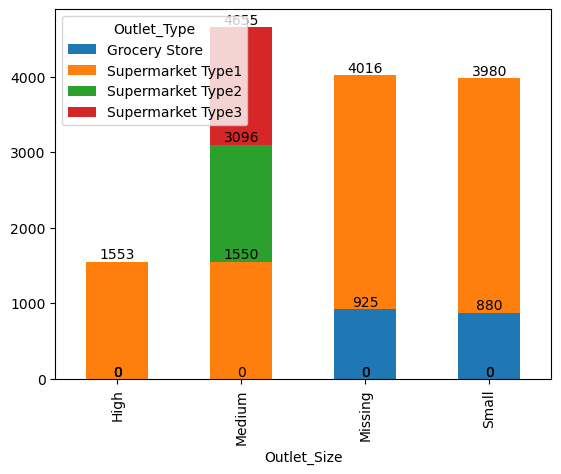

In [178]:
# 4) Cross Tabulation of Outlet Size and Outlet Type & Stacked barplot

ax = pd.crosstab(trainbigmart.Outlet_Size, trainbigmart.Outlet_Type).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

### groupby()

In [183]:
trbgmart = pd.read_csv('train.csv')

In [190]:
trbgmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Code
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [185]:
# Average Item Outlet Sales by Outlet Size
trbgmart.Item_Outlet_Sales.groupby(trbgmart.Outlet_Size).mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [186]:
# Average Item Outlet Sales by Outlet Location Type
trbgmart.Item_Outlet_Sales.groupby(trbgmart.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [188]:
trbgmart['Item_Code'] = trbgmart.Item_Identifier.str[0:2]

In [189]:
# Average Item Outlet Sales by Item Code
trbgmart.Item_Outlet_Sales.groupby(trbgmart.Item_Code).mean()

Item_Code
DR    1997.333337
FD    2215.354223
NC    2142.721364
Name: Item_Outlet_Sales, dtype: float64

In [198]:
# Test Null Average Item Outlet Sales of different Outlet Size Equal

from scipy.stats import f_oneway

f_oneway(trbgmart[trbgmart.Outlet_Size == 'Medium'].Item_Outlet_Sales, 
         trbgmart[trbgmart.Outlet_Size == 'Missing'].Item_Outlet_Sales,
         trbgmart[trbgmart.Outlet_Size == 'Small'].Item_Outlet_Sales,
         trbgmart[trbgmart.Outlet_Size == 'High'].Item_Outlet_Sales)

F_onewayResult(statistic=143.6574668135224, pvalue=8.228023520649935e-91)

In [197]:
trbgmart.Outlet_Size.value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [202]:
# Test Null Average Item Outlet Sales of different Outlet Type Equal

f_oneway(trbgmart[trbgmart.Outlet_Type == 'Supermarket Type1'].Item_Outlet_Sales,
         trbgmart[trbgmart.Outlet_Type == 'Grocery Store'].Item_Outlet_Sales,
         trbgmart[trbgmart.Outlet_Type == 'Supermarket Type3'].Item_Outlet_Sales,
         trbgmart[trbgmart.Outlet_Type == 'Supermarket Type2'].Item_Outlet_Sales)

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [209]:
# Test Null No Association between Outlet size and outlet type

from scipy.stats import chi2_contingency

chi2_contingency(pd.crosstab(trbgmart.Outlet_Size, trbgmart.Outlet_Type))

Chi2ContingencyResult(statistic=5380.286956123781, pvalue=0.0, dof=9, expected_freq=array([[ 118.42731433,  609.85146075,  101.47788337,  102.24334155],
       [ 354.90073918, 1827.59134108,  304.10700458,  306.40091517],
       [ 306.23372052, 1576.97641675,  262.40525637,  264.38460636],
       [ 303.43822598, 1562.58078141,  260.00985568,  261.97113692]]))

In [210]:
# Test Null No Association between outlet size and outlet location type
chi2_contingency(pd.crosstab(trbgmart.Outlet_Size, trbgmart.Outlet_Location_Type))

Chi2ContingencyResult(statistic=7095.276431132899, pvalue=0.0, dof=6, expected_freq=array([[ 261.13058782,  304.54300129,  366.32641089],
       [ 782.55121436,  912.64871524, 1097.8000704 ],
       [ 675.24111228,  787.49853338,  947.26035434],
       [ 669.07708553,  780.30975009,  938.61316438]]))